#Yulu:
 is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:

Which variables are significant in predicting the demand for

*   shared electric cycles in the Indian market?
*   
How well those variables describe the electric cycle demands



#Column Profiling:

datetime: datetime
season: season (1: spring, 2: summer, 3: fall, 4: winter)
holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:


*   Clear, Few clouds, partly cloudy, partly cloudy
*   Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist


*   Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp: temperature in Celsius  



*   atemp: feeling temperature in Celsius
*   humidity: humidity

windspeed: wind speed
casual: count of casual users
registered: count of registered users
count: count of total rental bikes including both casual and registered

Concept Used:

Bi-Variate Analysis
2-sample t-test: testing for difference across populations
ANNOVA
Chi-square

In [26]:
# Importing required libraries -
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway,kruskal # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence
from statsmodels.graphics.gofplots import qqplot

In [27]:
df=pd.read_csv('bike_sharing.csv')
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


Column Profiling:

1.   datetime: datetime
season: season (1: spring, 2: summer, 3: fall, 4: winter)
2.   holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)


*   workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp: temperature in Celsius
*  atemp: feeling temperature in Celsius
humidity: humidity
windspeed: wind speed
casual: count of casual users
registered: count of registered users
count: count of total rental bikes including both casual and registered.

In [28]:
df.shape

(10886, 12)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [30]:
df_c=df.drop('datetime',axis=1)


In [31]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


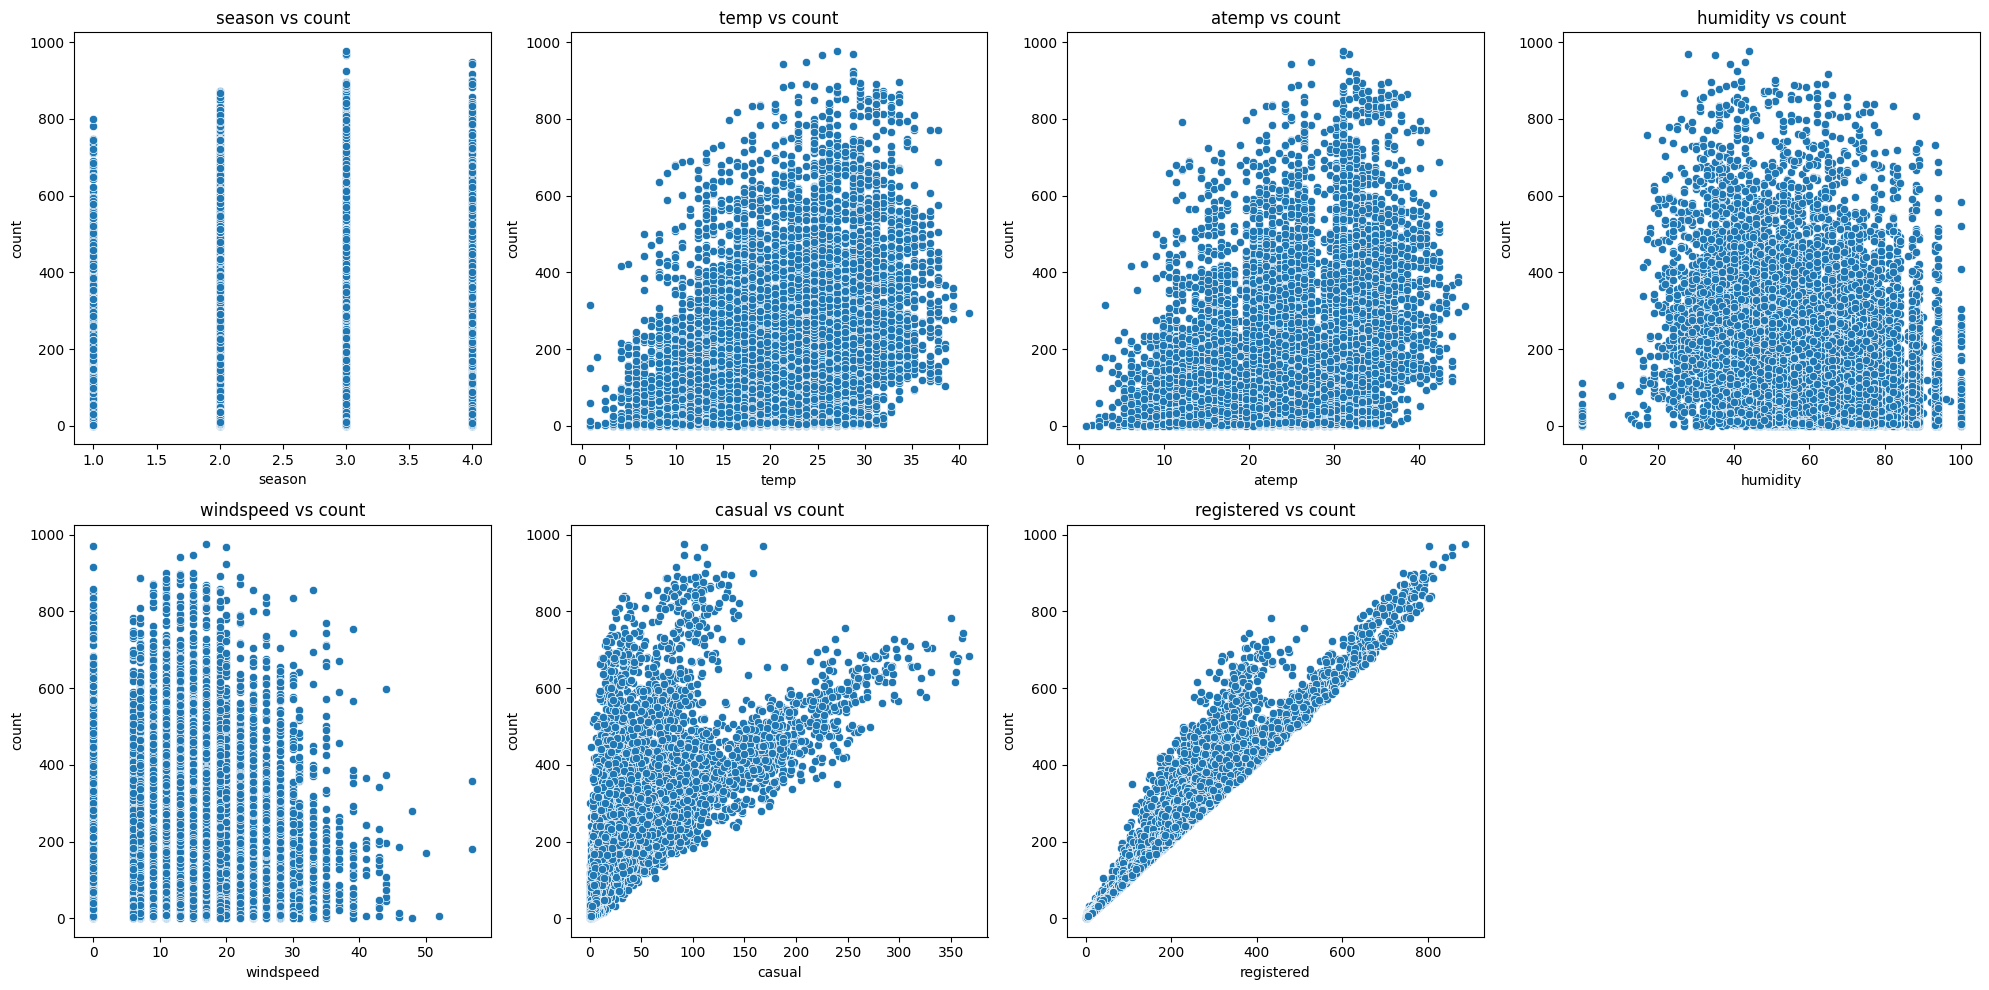

In [32]:
numeric = ['season', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Creating 2 rows, 4 columns of subplots for 7 plots (excluding 'count')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Manually assign each subplot
sbn.scatterplot(x=df['season'], y=df['count'], ax=axes[0, 0])
axes[0, 0].set_title('season vs count')

sbn.scatterplot(x=df['temp'], y=df['count'], ax=axes[0, 1])
axes[0, 1].set_title('temp vs count')

sbn.scatterplot(x=df['atemp'], y=df['count'], ax=axes[0, 2])
axes[0, 2].set_title('atemp vs count')

sbn.scatterplot(x=df['humidity'], y=df['count'], ax=axes[0, 3])
axes[0, 3].set_title('humidity vs count')

sbn.scatterplot(x=df['windspeed'], y=df['count'], ax=axes[1, 0])
axes[1, 0].set_title('windspeed vs count')

sbn.scatterplot(x=df['casual'], y=df['count'], ax=axes[1, 1])
axes[1, 1].set_title('casual vs count')

sbn.scatterplot(x=df['registered'], y=df['count'], ax=axes[1, 2])
axes[1, 2].set_title('registered vs count')

# Hide the last unused subplot (axes[1, 3])
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

**SCATTER-PLOT**
To Visually Assess the Relationship:
Scatter plots help us observe if a relationship exists between the two variables:

A linear upward or downward trend suggests a strong association.

A curved but consistent trend indicates a monotonic (but non-linear) relationship.

A random cloud of points suggests little to no relationship.

To Decide the Type of Correlation Test:

If the relationship appears linear, we might use Pearson correlation.

If the relationship is monotonic but not linear, Spearman correlation is more appropriate.

If there is no clear trend, correlation may not be meaningful at all.

To Detect Patterns and Outliers:
Scatter plots also help in identifying:

Outliers that can distort correlation values.

Subgroup patterns or clusters that may not be obvious in summary statistics.


In [33]:
df_c=df[numeric]
df_c.corr(method='spearman')

,season,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.248172,0.246713,0.186981,-0.131726,0.164379,0.177400,0.176376
temp,0.248172,1.000000,0.987128,-0.046854,-0.005535,0.573034,0.352174,0.407989
atemp,0.246713,0.987128,1.000000,-0.042028,-0.036350,0.571588,0.350577,0.406562
humidity,0.186981,-0.046854,-0.042028,1.000000,-0.324447,-0.378254,-0.332785,-0.354049
windspeed,-0.131726,-0.005535,-0.036350,-0.324447,1.000000,0.135040,0.131011,0.135777
casual,0.164379,0.573034,0.571588,-0.378254,0.135040,1.000000,0.775785,0.847378
registered,0.177400,0.352174,0.350577,-0.332785,0.131011,0.775785,1.000000,0.988901
count,0.176376,0.407989,0.406562,-0.354049,0.135777,0.847378,0.988901,1.000000


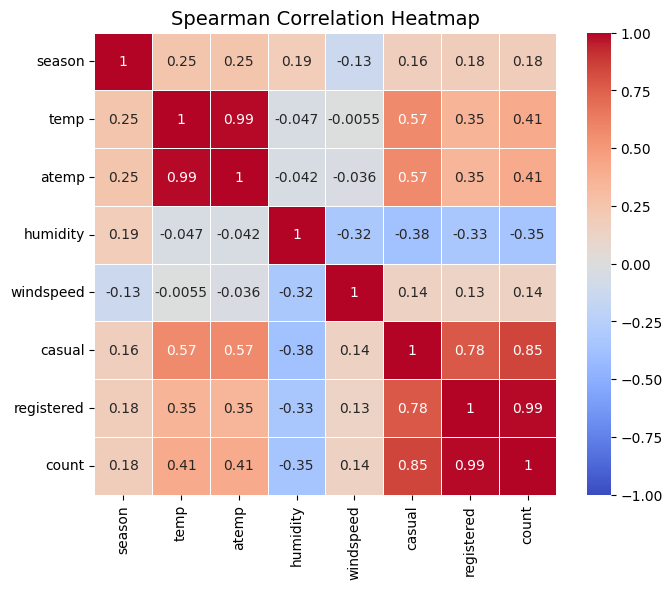

In [34]:
plt.figure(figsize=(8, 6))
sbn.heatmap(
    df_c.corr(method='spearman'),
    annot=True,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    square=True,
    vmin=-1, vmax=1
)
plt.title("Spearman Correlation Heatmap", fontsize=14)
plt.show()


In [35]:
# Dropping highly correlated columns -
df = df.drop(columns=['casual', 'registered', 'atemp'])

<Axes: xlabel='count', ylabel='Count'>

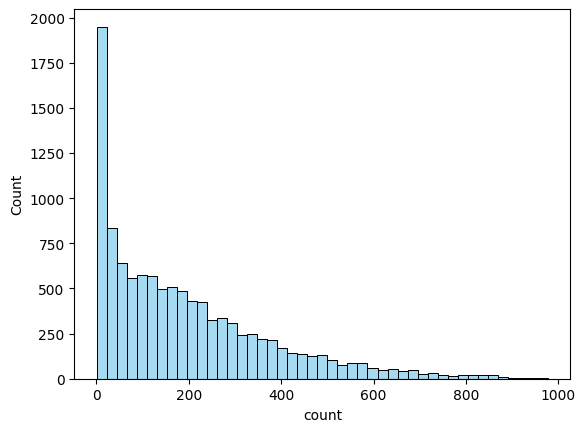

In [36]:
sbn.histplot(x=df['count'], color="skyblue")


<Axes: xlabel='count'>

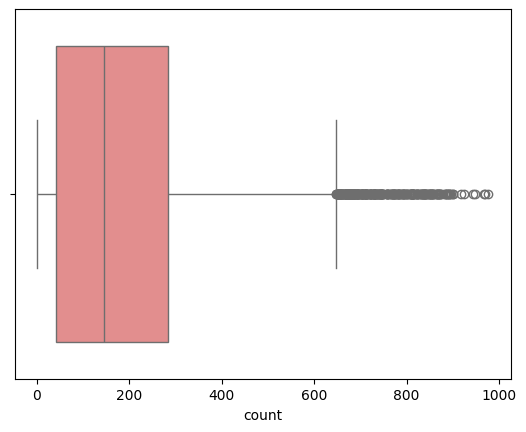

In [37]:
sbn.boxplot(x=df['count'],color='lightcoral')

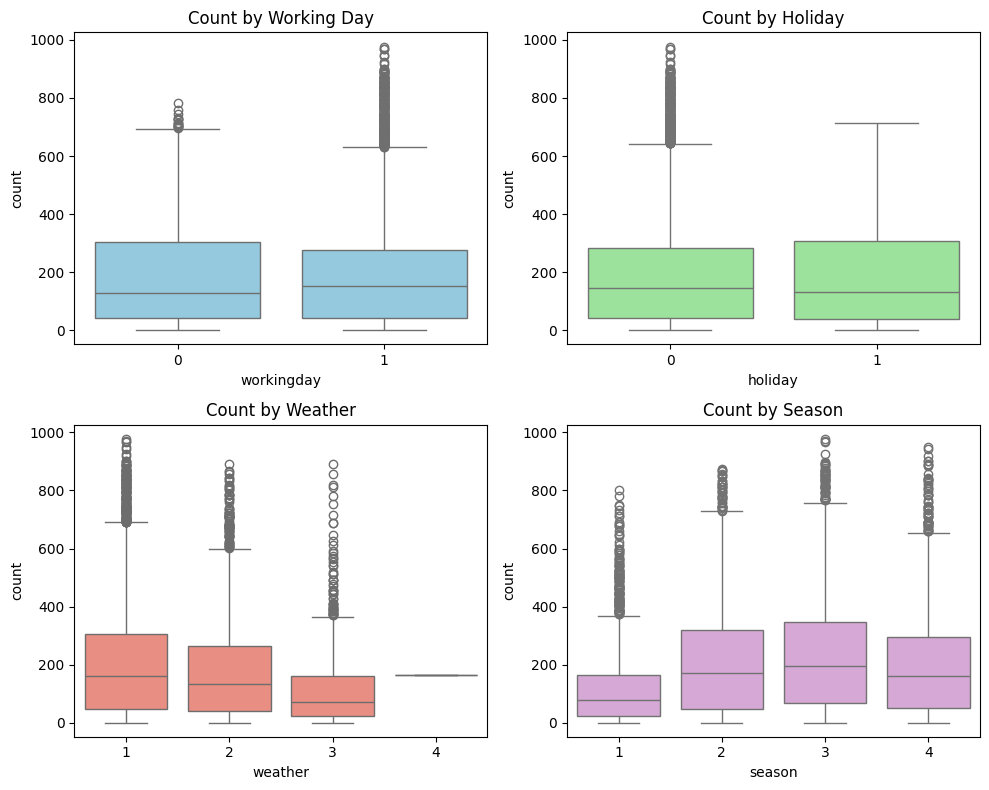

In [38]:
plt.figure(figsize=(10, 8))

# Subplot 1: workingday
plt.subplot(2, 2, 1)
sbn.boxplot(x='workingday', y='count', data=df, color="skyblue")
plt.title("Count by Working Day")

# Subplot 2: holiday
plt.subplot(2, 2, 2)
sbn.boxplot(x='holiday', y='count', data=df, color="lightgreen")
plt.title("Count by Holiday")

# Subplot 3: weather
plt.subplot(2, 2, 3)
sbn.boxplot(x='weather', y='count', data=df, color="salmon")
plt.title("Count by Weather")

# Subplot 4: season
plt.subplot(2, 2, 4)
sbn.boxplot(x='season', y='count', data=df, color="plum")
plt.title("Count by Season")

plt.tight_layout()
plt.show()


In [39]:
q1 = df['count'].quantile(0.25)
q3 = df['count'].quantile(0.75)
iqr = q3-q1

df = df[(df['count']>(q1-1.5*iqr) ) & (df['count']<(q3+1.5*iqr))]

print("No. of rows : ", df.shape[0])

No. of rows :  10583


<Axes: xlabel='count', ylabel='Count'>

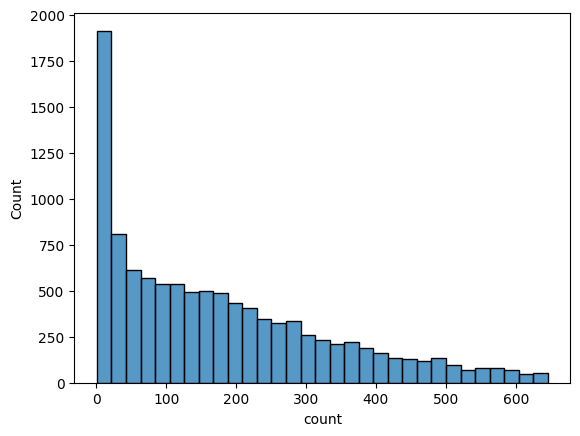

In [40]:
sbn.histplot(x=df['count'])

#EDA based insights-

*   The dataset contains a total of 10,886 observations, with each row representing a bike rental record.
*   No missing values or duplicate entries were found, indicating a clean and complete dataset ready for analysis.

*  
The features temp (actual temperature) and atemp (feels-like temperature) were found to be highly correlated (near-linear relationship)
*   To avoid multicollinearity, which can distort model interpretability and feature importance, the atemp column was dropped.

*   The target variable count (total rentals) was found to be strongly correlated with both casual and registered user counts.

*   Since count = casual + registered, retaining all three would introduce redundancy. Hence, to prevent data leakage and reduce multicollinearity, the casual and registered columns were dropped.














*   
Outliers were identified in the count column, especially during peak usage hours or specific weather conditions.
*   These were retained for analysis, as they may reflect genuine demand surges rather than data errors.





*   
Numerical features such as humidity, windspeed, and temp were further analyzed using scatter plots and correlation matrices to assess their relationship with count.
*   The dataset includes important categorical variables like season, holiday, workingday, and weather, which were later evaluated using statistical tests (like Levene’s Test, ANOVA, and Chi-square) to assess their impact on rental counts.





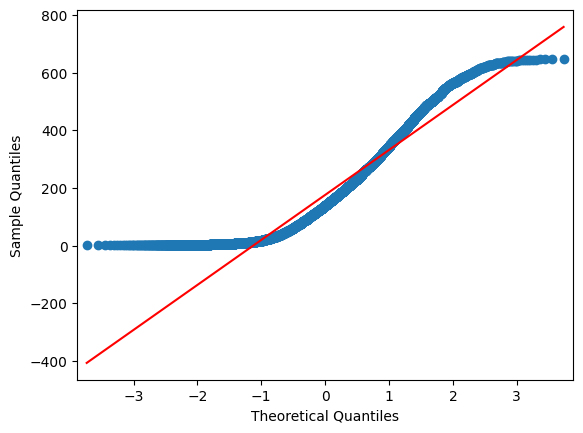

In [41]:
qqplot(df['count'],line='s')
plt.show()

#Is there anysignificant difference between the no of bike rides on weekdays and weekends?

In [42]:
df.groupby('workingday')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3422.0,180.965517,163.782166,1.0,43.0,124.0,295.75,645.0
1,7161.0,173.011591,152.358993,1.0,38.0,143.0,262.00,646.0


1-Define Null Hypothesis and Alternate Hypothesis-

$H_0:$ The demand of bikes on weekdays is greater or similar to the demand of bikes on weekend.

$H_a:$ The demand of bikes on weekdays is less than the demand of bikes on weekend.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on weekdays and weekends respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 >= \mu_2$

$H_a: \mu_1 < \mu_2$



In [43]:
weekday = df[df['workingday'] == 1]['count']
weekend = df[df['workingday'] == 0]['count']


Before performing hypothesis tests like the t-test or ANOVA, it's important to check if the groups being compared have equal variances — a key assumption for these tests. We used the Levene Test to assess the homogeneity of variances across groups. Unlike other tests, Levene’s test is robust to non-normal data, making it a suitable choice when data distributions are not perfectly normal. If the test returns a p-value > 0.05, we assume equal variances; otherwise, we conclude that variances are significantly different and choose appropriate alternatives (like Welch’s t-test).

#### Levene’s test -

We will test the null hypothesis

>$H_0$: All the count variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [44]:
stat,p=levene(weekday,weekend)
stat,p

(np.float64(24.52443516046393), np.float64(7.450676972537556e-07))

In [45]:
alpha = 0.05

if p < alpha:
    print(" Reject the null hypothesis: Variances are significantly different.")
else:
    print(" Fail to reject the null hypothesis: Variances are equal (homogeneous).")

 Reject the null hypothesis: Variances are significantly different.


** Interpretation:**
There is strong statistical evidence that the variances of the groups are not equal. This violates the assumption of equal variances (homoscedasticity).

In [46]:
round(weekday.std(), 2),round(weekend.std(), 2)


(152.36, 163.78)

#### Shapiro-Wilk’s test -

We will test the null hypothesis

>$H_0:$ Count follows normal distribution

against the alternative hypothesis

>$H_a:$ Count doesn't follow normal distribution



In [47]:
alpha=0.5

In [48]:
stat_wd, p_wd = shapiro(weekday)
stat_wd, p_wd

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7161.
  res = hypotest_fun_out(*samples, **kwds)


(np.float64(0.9066912976465091), np.float64(1.3356136912462587e-54))

In [49]:
if p_wd < alpha:
    print(" Reject the null hypothesis: Data is NOT normally distributed.")
else:
    print("Fail to reject the null hypothesis: Data appears normally distributed.")

 Reject the null hypothesis: Data is NOT normally distributed.


In [50]:
stat_wd, p_wd = shapiro(weekend)
stat_wd, p_wd

(np.float64(0.8888112815497913), np.float64(2.583554129978801e-44))

In [51]:
if p_wd < alpha:
    print(" Reject the null hypothesis: Data is NOT normally distributed.")
else:
    print(" Fail to reject the null hypothesis: Data appears normally distributed.")

 Reject the null hypothesis: Data is NOT normally distributed.


The data for both working days and non-working days does not follow a normal distribution.

T-test

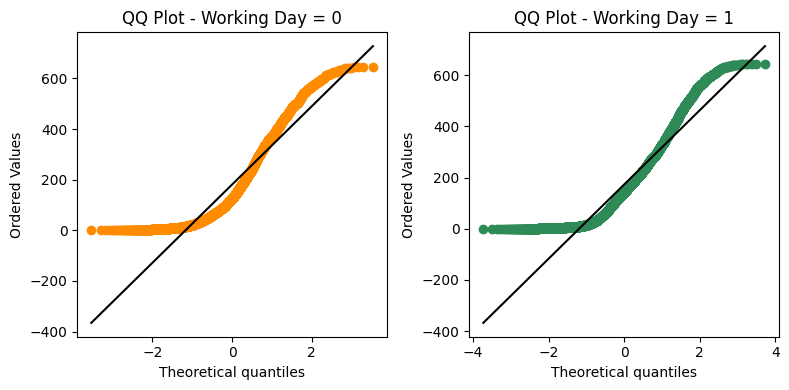

In [52]:
# Split the data based on workingday
count_working_0 = df[df['workingday'] == 0]['count']
count_working_1 = df[df['workingday'] == 1]['count']

# Plotting QQ plots side by side
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
stats.probplot(count_working_0, dist="norm", plot=plt)
plt.title('QQ Plot - Working Day = 0')
plt.gca().get_lines()[0].set_color("darkorange")  # points
plt.gca().get_lines()[1].set_color("black")       # reference line

plt.subplot(1, 2, 2)
stats.probplot(count_working_1, dist="norm", plot=plt)
plt.title('QQ Plot - Working Day = 1')
plt.gca().get_lines()[0].set_color("seagreen")    # points
plt.gca().get_lines()[1].set_color("black")       # reference line

plt.tight_layout()
plt.show()


In [53]:
alpha=0.5

According to CLT , the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution.

* In other words, if we find the mean of a large number of independent random variables, the mean
will follow a normal distribution, irrespective of the distribution of the original variables.

* In practice, sample sizes equal to or greater than 30-40 are often considered sufficient for the CLT to hold.

In [54]:
test_stat, p_value = ttest_ind(weekday, weekend,equal_var=False, alternative='less')
test_stat, p_value

(np.float64(-2.3894729938440786), np.float64(0.008450853509503345))

In [55]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(weekday, weekend, alternative='less')
stat,p

(np.float64(11998982.0), np.float64(0.04233055260957433))

In [56]:
if p_value < alpha:
    print(" Reject the null hypothesis: Means are significantly different (Welch's t-test).")
else:
    print(" Fail to reject the null hypothesis: No significant difference in means (Welch's t-test).")

 Reject the null hypothesis: Means are significantly different (Welch's t-test).


Both Welch’s t-test and the Mann-Whitney U test suggest that weekday rental counts are significantly lower than weekend counts. Welch’s t-test, with a p-value of 0.0085, provides stronger evidence when assuming normality under large sample size, while the Mann-Whitney U test (p = 0.0423) supports the result using a distribution-free approach. The agreement between both tests strengthens the confidence in our finding.

---
### Ques. 2 - Is there any significant difference between the no. of bike rides on regular days and holidays?
---

$H_0:$ The demand of bikes on regular days is greater or similar to the demand of bikes on holidays.

$H_a:$ The demand of bikes on regular days is less than the demand of bikes on holidays.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on regular days and holidays respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 >= \mu_2$

$H_a: \mu_1 < \mu_2$

In [57]:
#holidays
df.groupby('holiday')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10274.0,175.372786,155.950275,1.0,40.0,138.0,269.0,646.0
1,309.0,182.588997,163.766590,1.0,38.0,127.0,304.0,597.0


In [58]:
zero = df[df['holiday'] == 0]['count']
one= df[df['holiday'] == 1]['count']


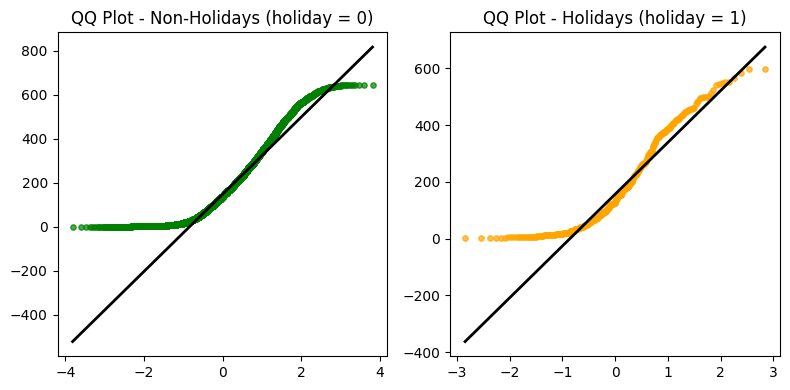

In [59]:
plt.figure(figsize=(8, 4))

# QQ plot for non-holiday
plt.subplot(1, 2, 1)
res0 = stats.probplot(zero, dist="norm")
plt.scatter(res0[0][0], res0[0][1], color="green", s=15, alpha=0.7)  # points
plt.plot(res0[0][0], res0[1][0] + res0[1][1]*res0[0][0], color="black", lw=2)  # line
plt.title('QQ Plot - Non-Holidays (holiday = 0)')

# QQ plot for holiday
plt.subplot(1, 2, 2)
res1 = stats.probplot(one, dist="norm")
plt.scatter(res1[0][0], res1[0][1], color="orange", s=15, alpha=0.7)  # points
plt.plot(res1[0][0], res1[1][0] + res1[1][1]*res1[0][0], color="black", lw=2)  # line
plt.title('QQ Plot - Holidays (holiday = 1)')

plt.tight_layout()
plt.show()


In [60]:
stat,p=shapiro(zero)
stat,p

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10274.
  res = hypotest_fun_out(*samples, **kwds)


(np.float64(0.902052728413785), np.float64(1.6557442725463876e-62))

In [61]:
if p < alpha:
    print(" Reject the null hypothesis: Data is NOT normally distributed.")
else:
    print(" Fail to reject the null hypothesis: Data appears normally distributed.")

 Reject the null hypothesis: Data is NOT normally distributed.


In [62]:
stat,p=shapiro(one)
stat,p

(np.float64(0.8917174119556428), np.float64(5.0632306255833854e-14))

In [63]:
if p < alpha:
    print(" Reject the null hypothesis: Data is NOT normally distributed.")
else:
    print(" Fail to reject the null hypothesis: Data appears normally distributed.")

 Reject the null hypothesis: Data is NOT normally distributed.


Both the p_values are < 0.5(significance level) proving that the data is not normal.

In [64]:
st,p=levene(zero,one)
st,p

(np.float64(3.5341198554621243), np.float64(0.060145684976032954))

In [65]:
alpha = 0.05

if p < alpha:
    print(" Reject the null hypothesis: Variances are significantly different.")
else:
    print(" Fail to reject the null hypothesis: Variances are equal (homogeneous).")

 Fail to reject the null hypothesis: Variances are equal (homogeneous).


The Levene’s test for equality of variances gives a p-value of 0.0604, which is greater than 0.05.
Therefore, we do not have enough evidence to say the variances are different.
We assume equal variances between the two groups (zero and one).

In [66]:
test_stat, p_value = ttest_ind(zero, one,alternative='less')
test_stat, p_value

(np.float64(-0.8002380245944458), np.float64(0.2117954344398152))

In [67]:
if p_value < alpha:
    print(" Reject the null hypothesis: Means are significantly different (Welch's t-test).")
else:
    print(" Fail to reject the null hypothesis: No significant difference in means (Welch's t-test).")

 Fail to reject the null hypothesis: No significant difference in means (Welch's t-test).


In [68]:
stat, p = mannwhitneyu(zero, one,alternative='less')
stat,p

(np.float64(1560294.0), np.float64(0.3046822254802659))

In [69]:
if p < alpha:
    print(" Reject the null hypothesis: Means are significantly different (Welch's t-test).")
else:
    print(" Fail to reject the null hypothesis: No significant difference in means (Welch's t-test).")

 Fail to reject the null hypothesis: No significant difference in means (Welch's t-test).


**Observation:** Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides during regular days(zero) is greater than or equal to those on holidays(one).

#Check if demand for bicycles on rent is same for the different seasons.

In [70]:
s1 = df[df['season'] == 1]['count']
s2 = df[df['season'] == 2]['count']
s3 = df[df['season'] == 3]['count']
s4 = df[df['season'] == 4]['count']

In [71]:
df.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2670.0,112.795131,116.884929,1.0,24.00,78.0,161.00,644.0
2,2633.0,195.653627,166.170802,1.0,45.00,165.0,299.00,646.0
3,2616.0,210.484327,164.055532,1.0,59.75,185.0,323.25,646.0
4,2664.0,184.404655,154.563069,1.0,48.75,154.0,276.25,646.0


In [72]:
s,p=levene(s1,s2,s3,s4)
s,p

(np.float64(177.52397676140944), np.float64(2.6643548968275643e-112))

In [73]:
alpha = 0.05

if p < alpha:
    print(" Reject the null hypothesis: Variances are significantly different.")
else:
    print(" Fail to reject the null hypothesis: Variances are equal (homogeneous).")

 Reject the null hypothesis: Variances are significantly different.


Variances of the groups are not equal

**Testing normality-**

In [74]:
s,p = shapiro(s1)
s,p

(np.float64(0.831310286569649), np.float64(1.2186365812915587e-46))

In [75]:
s,p=shapiro(s2)
s,p

(np.float64(0.9153987643200903), np.float64(4.785969808319291e-36))

In [76]:
s,p= shapiro(s3)
s,p

(np.float64(0.9372023241968885), np.float64(6.611204190837232e-32))

In [77]:
s,p=shapiro(s4)
s,p

(np.float64(0.919047460363043), np.float64(1.3185660101555007e-35))

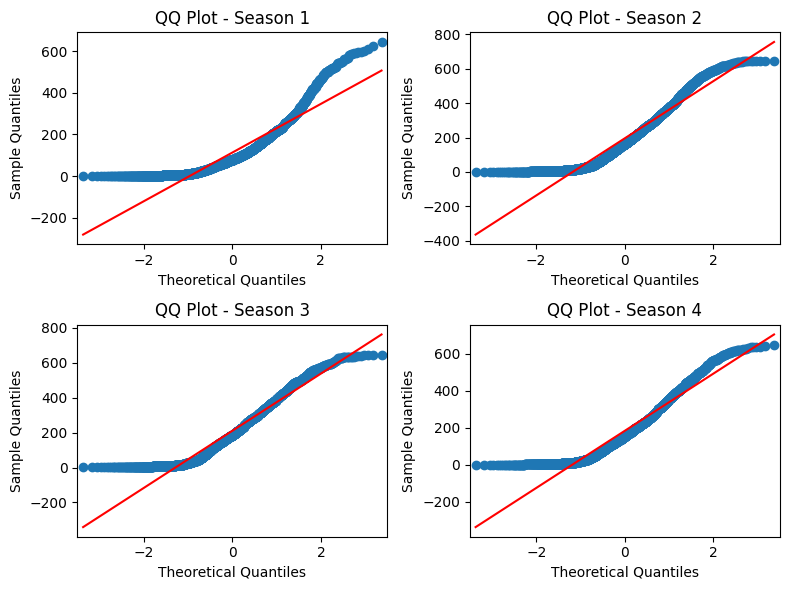

In [78]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
qqplot(s1, line='s', ax=plt.gca())
plt.title('QQ Plot - Season 1')

plt.subplot(2, 2, 2)
qqplot(s2, line='s', ax=plt.gca())
plt.title('QQ Plot - Season 2')

plt.subplot(2, 2, 3)
qqplot(s3, line='s', ax=plt.gca())
plt.title('QQ Plot - Season 3')

plt.subplot(2, 2, 4)
qqplot(s4, line='s', ax=plt.gca())
plt.title('QQ Plot - Season 4')

plt.tight_layout()
plt.show()


None of the groups are normal-

In [79]:
test_stat, p_value = f_oneway(s1, s2, s3, s4)
test_stat, p_value

(np.float64(217.266984095718), np.float64(8.891092521664531e-137))

In [80]:
test_stat, p_value = kruskal(s1, s2, s3, s4)
test_stat, p_value

(np.float64(619.3679817851395), np.float64(6.376253250003707e-134))

Here, since the data was large enough the conclusion did not make any difference. Even when the data was not normally distributed and variance were not equal, anova test did not bring the wrong result as tested by Kruskal-wallis test which when used, do not require the data to be 'gaussian' and 'equal-variance'.

---
###  - Is the demand of bicycles on rent same for different weather conditions?
---

#### **Step 1:** Define the null and alternate hypothesis

$H_a:$ The average no. of bike rides in different weather conditions  are equal.

$H_a:$ The average no. of bike rides in different weather conditions are not equal.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on weekdays and weekends respectively.

In [81]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


drop '4 because only one data-point is there

In [82]:
df = df[~(df['weather']==4)]

In [83]:
W1 = df[df['weather'] == 1]['count']
W2 = df[df['weather'] == 2]['count']
W3 = df[df['weather'] == 3]['count']

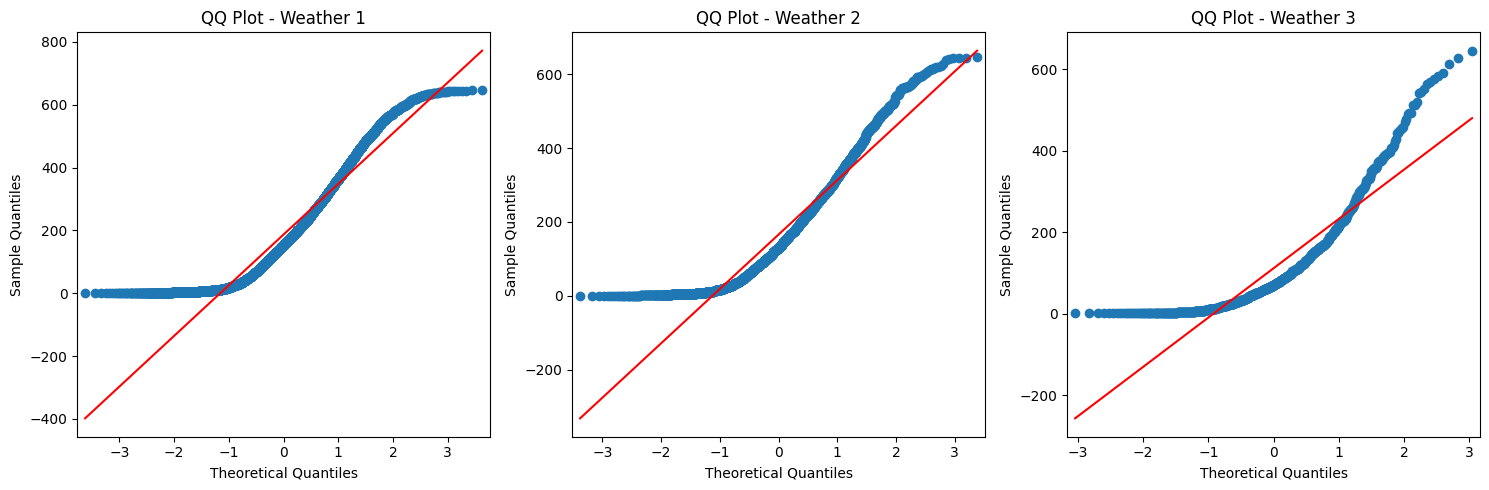

In [84]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
qqplot(W1, line='s', ax=plt.gca())
plt.title('QQ Plot - Weather 1')

plt.subplot(1, 3, 2)
qqplot(W2, line='s', ax=plt.gca())
plt.title('QQ Plot - Weather 2')

plt.subplot(1, 3, 3)
qqplot(W3, line='s', ax=plt.gca())
plt.title('QQ Plot - Weather 3')

plt.tight_layout()
plt.show()


In [85]:
from scipy.stats import shapiro

# Weather 1
stat1, p1 = shapiro(W1)
print(f"Weather 1 → Shapiro stat = {stat1:.4f}, p-value = {p1:.4f}")
if p1 < 0.05:
    print("   Not normally distributed.")
else:
    print("   Normally distributed.")

# Weather 2
stat2, p2 = shapiro(W2)
print(f"Weather 2 → Shapiro stat = {stat2:.4f}, p-value = {p2:.4f}")
if p2 < 0.05:
    print("   Not normally distributed.")
else:
    print("   Normally distributed.")

# Weather 3
stat3, p3 = shapiro(W3)
print(f"Weather 3 → Shapiro stat = {stat3:.4f}, p-value = {p3:.4f}")
if p3 < 0.05:
    print("Not normally distributed.")
else:
    print("Normally distributed.")


Weather 1 → Shapiro stat = 0.9117, p-value = 0.0000
   Not normally distributed.
Weather 2 → Shapiro stat = 0.9032, p-value = 0.0000
   Not normally distributed.
Weather 3 → Shapiro stat = 0.8118, p-value = 0.0000
Not normally distributed.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6962.
  res = hypotest_fun_out(*samples, **kwds)


p_val << 0.5, data's distribution significantly differs from a normal distribution.

In [86]:

stat, p_value = levene(W1, W2, W3)
alpha = 0.05

print(f"Levene’s Test Statistic = {stat:.4f}, p-value = {p_value:.4f}")

if p_value < alpha:
    print(" Reject the null hypothesis: Variances are significantly different across weather conditions.")
else:
    print(" Fail to reject the null hypothesis: Variances are equal (homogeneous) across weather conditions.")


Levene’s Test Statistic = 86.7938, p-value = 0.0000
 Reject the null hypothesis: Variances are significantly different across weather conditions.


In [87]:
test_stat, p_value = f_oneway(W1, W2, W3)
test_stat, p_value

(np.float64(96.56793301077973), np.float64(2.749873188252358e-42))

In [88]:
if p_value < alpha:
    print(" Reject the null hypothesis: At least one group's mean is significantly different (ANOVA).")
else:
    print(" Fail to reject the null hypothesis: No significant difference in group means (ANOVA).")

 Reject the null hypothesis: At least one group's mean is significantly different (ANOVA).


**Observation:** Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides in different weather conditions are not equal.

In [89]:
test_stat, p_value = kruskal(W1, W2, W3)
test_stat, p_value

(np.float64(186.92050093297613), np.float64(2.5747137072081145e-41))

Same observation using kruskal test.


---
###    Are the weather conditions significantly different during different seasons?
---



#### **Step 1:** Define the null and alternate hypothesis

$H_0:$ Weather conditions are independent of the season.

$H_a:$ Weather condition depends on the ongoing season.

#### **Step 2:** Select an appropriate test

Although the data values in 'season' and 'weather' columns are numerical, as per our intuition, they still represent different catgories. Hence, we will encode them accordingly before moving onto the tests.

In [90]:
dict1 = {1: 'Sunny',
         2: 'Cloudy',
         3: 'Rainy'}
df['weather_enc'] = df['weather'].map(dict1)

In [91]:
dict2 = {1: 'Summer',
         2: 'Monsoon',
         3: 'Winter',
         4: 'Autumn'}
df['season_enc'] = df['season'].map(dict2)

In [92]:
contigency= pd.crosstab(df.season_enc, df.weather_enc)
contigency

weather_enc,Cloudy,Rainy,Sunny
season_enc,,,
Autumn,787,221,1656
Monsoon,690,223,1720
Summer,714,211,1744
Winter,579,195,1842


<Axes: xlabel='season_enc'>

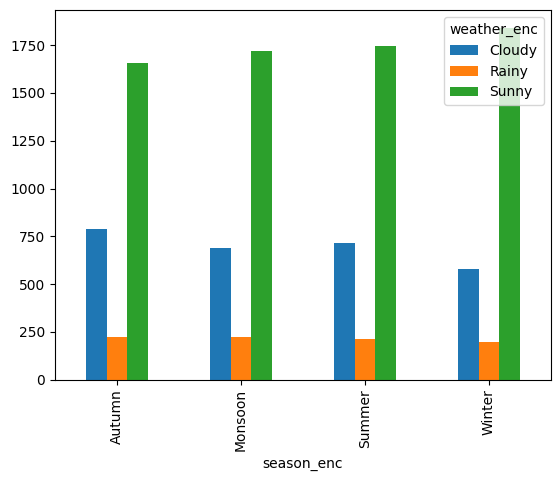

In [93]:
contigency.plot(kind='bar')

In [94]:
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction=False)
chi2,pval

(np.float64(44.1979555965044), np.float64(6.753122128664597e-08))

In [95]:

if pval < alpha:
    print(" Reject the null hypothesis: There is a significant association between the variables.")
else:
    print(" Fail to reject the null hypothesis: No significant association between the variables.")




 Reject the null hypothesis: There is a significant association between the variables.


**Observation:** Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the weather conditions are dependent on the ongoing season.

#Insights nased on Hypothesis testing-

*   Weather conditions have a significant impact on rental demand.
Using ANOVA/Kruskal-Wallis tests, it was observed that rental patterns vary across different weather types, with demand typically lower in bad weather (e.g., rain or mist).
*   Seasonal variation plays a key role in influencing bike rental demand.
 Rental counts fluctuate significantly across seasons — likely due to changes in temperature, daylight hours, and holiday schedules.

*  Weather conditions are statistically dependent on the season.
A Chi-square test confirmed that certain weather types are more likely to occur in specific seasons, reinforcing the interdependence between these categorical variables.










* Focus on Weekday Commuters
The data clearly indicates higher demand on working days compared to weekends and holidays.

 Recommendation:

Increase bike availability during weekday peak hours (especially mornings and evenings).

Design subscription plans or incentives targeted at daily office commuters.

Consider partnering with corporate hubs or IT parks to create micro-mobility zones.


*   Optimize Inventory Seasonally
Significant variation in demand was found across different seasons.

Recommendation:

Use seasonal demand forecasting to reallocate bikes across cities/zones.

For instance, increase fleet size during spring/summer, and reduce during winter or monsoon months where demand drops


*  Account for Weather Sensitivity
Demand is noticeably lower in unfavorable weather conditions (e.g., rain, mist).

 Recommendation:

Add weather-integrated demand prediction to your operational planning.

Temporarily pause or limit availability in certain zones during bad weather to avoid damage and reduce idle fleet.

Consider sending app notifications to alert users about weather-based availability or safety recommendations.
*  Simplify Feature Usage in Modeling
temp and atemp are highly correlated; so are count, casual, and registered.

 Recommendation:

For predictive models, avoid including highly correlated features to reduce redundancy and multicollinearity.

Rely on count as the unified target variable, and drop casual/registered unless user segmentation is needed.


*   Weather-Season Dependency Can Improve Forecasting
Weather conditions vary significantly across seasons (statistically proven).

 Recommendation:

Integrate seasonal weather trends into your demand forecasting models.

This can help preemptively manage supply, maintenance, and staffing needs more efficiently.


*   Consider Demand Outliers as Opportunities
Outliers in count are likely due to real high-demand days (e.g., festivals, events, public strikes).

 Recommendation:

Don’t treat these as noise; rather analyze them separately to detect spikes in demand due to local events.

Use this insight to deploy temporary surges in fleet during festivals, marathons, or public rallies.





